#NIFTY DAILY CLOSING PRICE


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


     Index              NSEI.Close   
 Min.   :2020-04-01   Min.   : 8084  
 1st Qu.:2021-05-17   1st Qu.:15203  
 Median :2022-06-27   Median :17522  
 Mean   :2022-06-28   Mean   :17290  
 3rd Qu.:2023-08-09   3rd Qu.:19409  
 Max.   :2024-09-27   Max.   :26216  
                      NA's   :1      


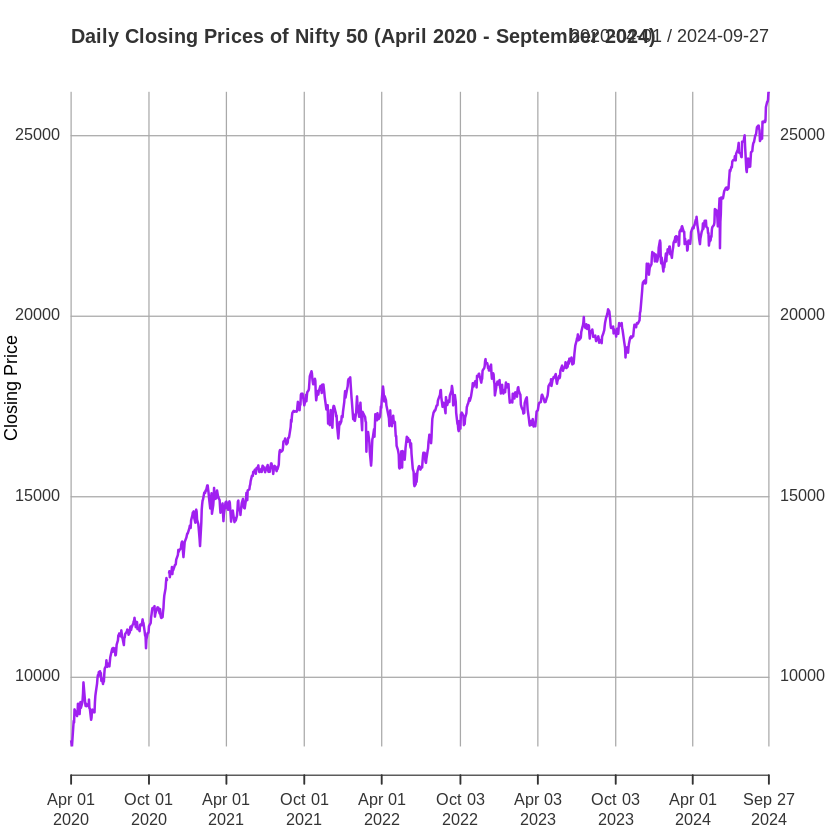

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Extract the closing prices
nifty_close <- Cl(nifty_data)

# Plot the closing prices and get summary
plot(nifty_close, main = "Daily Closing Prices of Nifty 50 (April 2020 - September 2024)",
     ylab = "Closing Price", xlab = "Date", col = "purple")

nifty_close_summary <- summary(nifty_close)
print(nifty_close_summary)

#CHAMBLFERT DAILY CLOSING PRICE


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



     Index            CHAMBLFERT.NS.Close
 Min.   :2020-04-01   Min.   :104.7      
 1st Qu.:2021-05-17   1st Qu.:257.4      
 Median :2022-06-27   Median :303.6      
 Mean   :2022-06-28   Mean   :307.6      
 3rd Qu.:2023-08-09   3rd Qu.:366.7      
 Max.   :2024-09-27   Max.   :557.9      


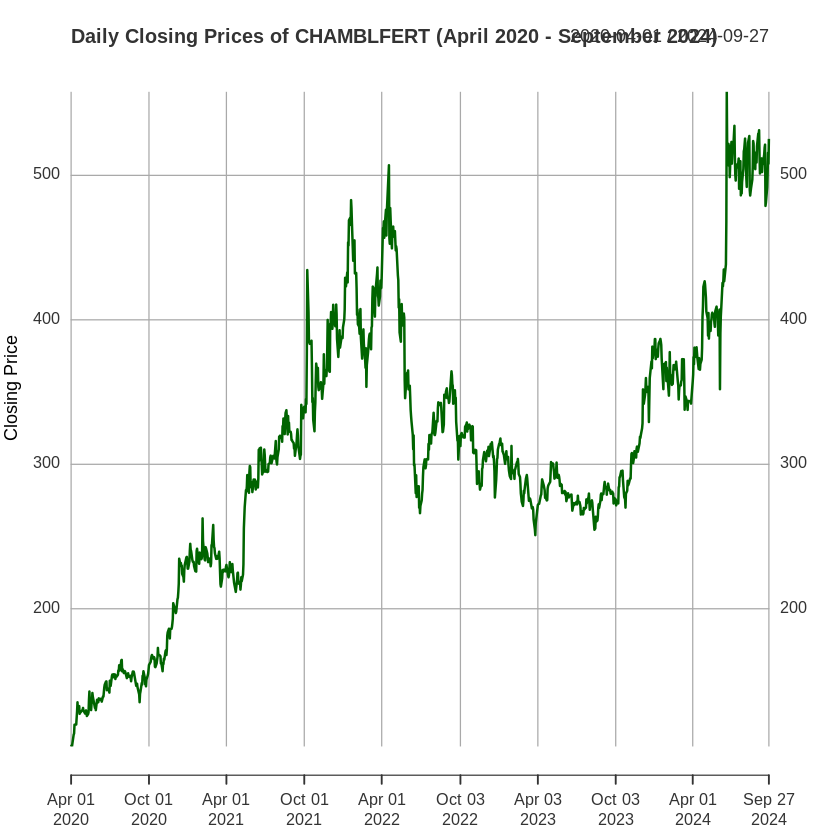

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Extract the closing prices
CHAMBLFERT_close <- Cl(CHAMBLFERT_data)

# Plot the closing prices and get summary
plot(CHAMBLFERT_close, main = "Daily Closing Prices of CHAMBLFERT (April 2020 - September 2024)",
     ylab = "Closing Price", xlab = "Date", col = "darkgreen")

CHAMBLFERT_close_summary <- summary(CHAMBLFERT_close)
print(CHAMBLFERT_close_summary)


#NIFTY DAILY RETURNS

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”


     Index            daily.returns      
 Min.   :2020-04-01   Min.   :-0.059294  
 1st Qu.:2021-05-18   1st Qu.:-0.003805  
 Median :2022-06-28   Median : 0.001415  
 Mean   :2022-06-29   Mean   : 0.001092  
 3rd Qu.:2023-08-09   3rd Qu.: 0.006947  
 Max.   :2024-09-27   Max.   : 0.087632  


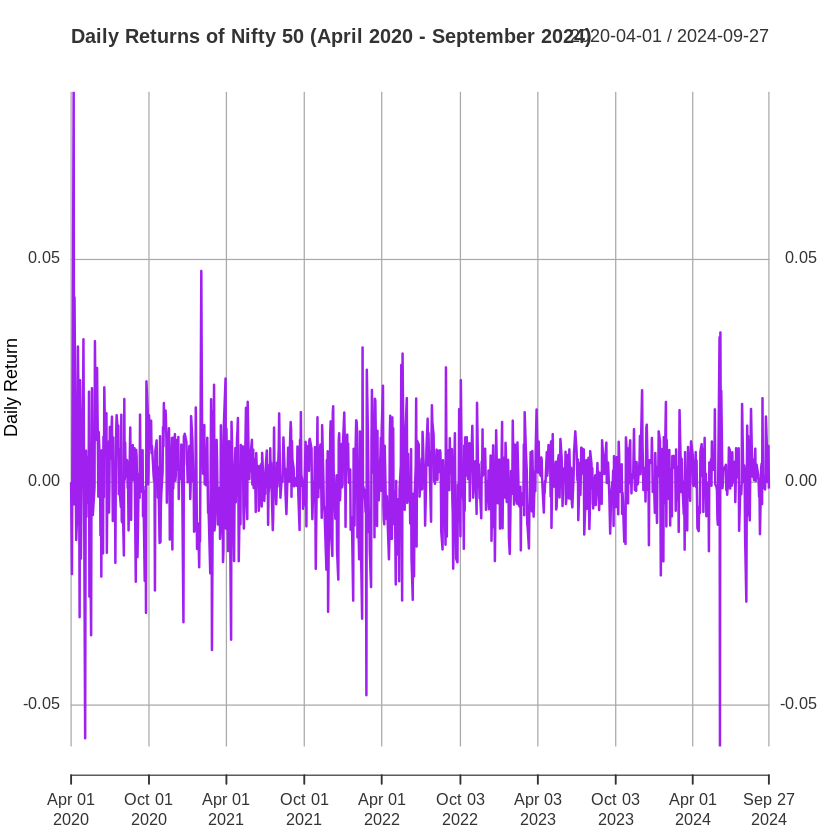

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Calculate daily returns
nifty_returns <- dailyReturn(Cl(nifty_data))

# Plot the daily returns and get summary
plot(nifty_returns, main = "Daily Returns of Nifty 50 (April 2020 - September 2024)",
     ylab = "Daily Return", xlab = "Date", col = "purple", type = "l")

nifty_returns_summary <- summary(nifty_returns)
print(nifty_returns_summary)


#CHAMBLFERT DAILY RETURNS

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



     Index            daily.returns      
 Min.   :2020-04-01   Min.   :-0.135470  
 1st Qu.:2021-05-17   1st Qu.:-0.012096  
 Median :2022-06-27   Median : 0.001294  
 Mean   :2022-06-28   Mean   : 0.001780  
 3rd Qu.:2023-08-09   3rd Qu.: 0.014576  
 Max.   :2024-09-27   Max.   : 0.192879  


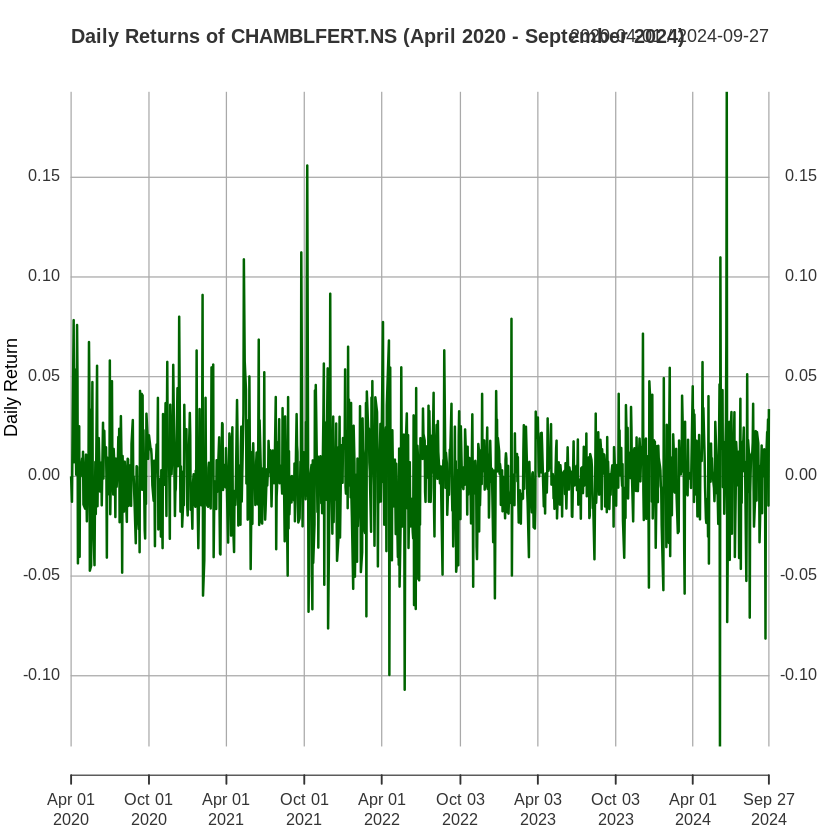

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Calculate daily returns
CHAMBLFERT_returns <- dailyReturn(Cl(CHAMBLFERT_data))

# Plot the daily returns and get summary
plot(CHAMBLFERT_returns, main = "Daily Returns of CHAMBLFERT.NS (April 2020 - September 2024)",
     ylab = "Daily Return", xlab = "Date", col = "darkgreen", type = "l")

CHAMBLFERT_returns_summary <- summary(CHAMBLFERT_returns)
print(CHAMBLFERT_returns_summary)


#ESTIMATING BETA USING CAPM (DAILY)


In [ ]:
install.packages("quantmod")
library(quantmod)
require(quantmod)

# Get data for Nifty 50 and CHAMBLFERT Equity
NSE <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
NSE
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
CHAMBLFERT

# Display the first and last 5 rows of NSE data
head(NSE, 5)
tail(NSE, 5)

# Create a data frame of the closing prices
Close <- cbind(Cl(NSE), Cl(CHAMBLFERT))
head(Close, 5)

# Calculate the returns
Returns <- as.xts(tail(data.frame(Close), -1) / head(data.frame(Close), -1) - 1)
head(Returns, 5)

# Run the regression model
regression <- lm(CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns))

# Slope parameter = beta in CAPM model
summary(regression)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-04-01   8584.10   8588.10  8198.35    8253.80      506300       8253.80
2020-04-03   8356.55   8356.55  8055.80    8083.80      697000       8083.80
2020-04-07   8446.30   8819.40  8360.95    8792.20      814200       8792.20
2020-04-08   8688.90   9131.70  8653.90    8748.75      896500       8748.75
2020-04-09   8973.05   9128.35  8904.55    9111.90      742100       9111.90
2020-04-13   9103.95   9112.05  8912.40    8993.85      644000       8993.85
2020-04-15   9196.40   9261.20  8874.10    8925.30      879100       8925.30
2020-04-16   8851.25   9053.75  8821.90    8992.80      719400       8992.80
2020-04-17   9323.45   9324.00  9091.35    9266.75      684200       9266.75
2020-04-20   9390.20   9390.85  9230.80    9261.85      726400       9261.85
       ...                                                                  
2024-09-16  25406.65  25445.70 25336.20   25383.75      168700      25383.75

           CHAMBLFERT.NS.Open CHAMBLFERT.NS.High CHAMBLFERT.NS.Low
2020-04-01             107.70             109.75            105.00
2020-04-03             105.50             107.25            103.20
2020-04-07             106.00             117.95            106.00
2020-04-08             112.00             123.70            110.00
2020-04-09             119.05             129.80            118.90
2020-04-13             119.90             123.00            116.75
2020-04-15             122.80             138.00            122.10
2020-04-16             131.00             136.50            128.10
2020-04-17             139.40             139.90            127.25
2020-04-20             130.40             135.60            126.00
       ...                                                        
2024-09-16             510.00             516.45            507.85
2024-09-17             515.50             522.70            512.10
2024-09-18             520.35             525.85            50

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-04-01   8584.10   8588.10  8198.35    8253.80      506300       8253.80
2020-04-03   8356.55   8356.55  8055.80    8083.80      697000       8083.80
2020-04-07   8446.30   8819.40  8360.95    8792.20      814200       8792.20
2020-04-08   8688.90   9131.70  8653.90    8748.75      896500       8748.75
2020-04-09   8973.05   9128.35  8904.55    9111.90      742100       9111.90

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2024-09-23  25872.55  25956.00 25847.35   25939.05      209200      25939.05
2024-09-24  25921.45  26011.55 25886.85   25940.40      384100      25940.40
2024-09-25  25899.45  26032.80 25871.35   26004.15      278500      26004.15
2024-09-26  26005.40  26250.90 25998.40   26216.05      370900      26216.05
2024-09-27  26248.25  26277.35 26151.40   26178.95      490300      26178.95

           NSEI.Close CHAMBLFERT.NS.Close
2020-04-01    8253.80              106.00
2020-04-03    8083.80              104.65
2020-04-07    8792.20              112.85
2020-04-08    8748.75              113.65
2020-04-09    9111.90              119.75

             NSEI.Close CHAMBLFERT.NS.Close
2020-04-03 -0.020596574       -0.0127358347
2020-04-07  0.087632105        0.0783563959
2020-04-08 -0.004941902        0.0070890834
2020-04-09  0.041508832        0.0536735450
2020-04-13 -0.012955671        0.0008350603


Call:
lm(formula = CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101926 -0.012892 -0.001183  0.011829  0.190092 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0007371  0.0007361   1.001    0.317    
NSEI.Close  0.9454860  0.0717122  13.184   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02438 on 1107 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1357,	Adjusted R-squared:  0.1349 
F-statistic: 173.8 on 1 and 1107 DF,  p-value: < 2.2e-16


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘plogr’, ‘timeDate’, ‘rex’, ‘RMySQL’, ‘RSQLite’, ‘timeSeries’, ‘downloader’, ‘covr’


Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-04-01   8584.10   8588.10  8198.35    8253.80      506300       8253.80
2020-04-03   8356.55   8356.55  8055.80    8083.80      697000       8083.80
2020-04-07   8446.30   8819.40  8360.95    8792.20      814200       8792.20
2020-04-08   8688.90   9131.70  8653.90    8748.75      896500       8748.75
2020-04-09   8973.05   9128.35  8904.55    9111.90      742100       9111.90
2020-04-13   9103.95   9112.05  8912.40    8993.85      644000       8993.85
2020-04-15   9196.40   9261.20  8874.10    8925.30      879100       8925.30
2020-04-16   8851.25   9053.75  8821.90    8992.80      719400       8992.80
2020-04-17   9323.45   9324.00  9091.35    9266.75      684200       9266.75
2020-04-20   9390.20   9390.85  9230.80    9261.85      726400       9261.85
       ...                                                                  
2024-09-17  25416.90  25441.65 25352.25   25418.55      216000      25418.55

           CHAMBLFERT.NS.Open CHAMBLFERT.NS.High CHAMBLFERT.NS.Low
2020-04-01             107.70             109.75            105.00
2020-04-03             105.50             107.25            103.20
2020-04-07             106.00             117.95            106.00
2020-04-08             112.00             123.70            110.00
2020-04-09             119.05             129.80            118.90
2020-04-13             119.90             123.00            116.75
2020-04-15             122.80             138.00            122.10
2020-04-16             131.00             136.50            128.10
2020-04-17             139.40             139.90            127.25
2020-04-20             130.40             135.60            126.00
       ...                                                        
2024-09-17             515.50             522.70            512.10
2024-09-18             520.35             525.85            506.05
2024-09-19             522.45             522.45            47

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2020-04-01   8584.10   8588.10  8198.35    8253.80      506300       8253.80
2020-04-03   8356.55   8356.55  8055.80    8083.80      697000       8083.80
2020-04-07   8446.30   8819.40  8360.95    8792.20      814200       8792.20
2020-04-08   8688.90   9131.70  8653.90    8748.75      896500       8748.75
2020-04-09   8973.05   9128.35  8904.55    9111.90      742100       9111.90

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2024-09-24  25921.45  26011.55 25886.85   25940.40      384100      25940.40
2024-09-25  25899.45  26032.80 25871.35   26004.15      278500      26004.15
2024-09-26  26005.40  26250.90 25998.40   26216.05      370900      26216.05
2024-09-27  26248.25  26277.35 26151.40   26178.95      490300      26178.95
2024-09-30  26061.30  26134.70 25794.10   25810.85      343100      25810.85

           NSEI.Close CHAMBLFERT.NS.Close
2020-04-01    8253.80              106.00
2020-04-03    8083.80              104.65
2020-04-07    8792.20              112.85
2020-04-08    8748.75              113.65
2020-04-09    9111.90              119.75

             NSEI.Close CHAMBLFERT.NS.Close
2020-04-03 -0.020596574       -0.0127358347
2020-04-07  0.087632105        0.0783563959
2020-04-08 -0.004941902        0.0070890834
2020-04-09  0.041508832        0.0536735450
2020-04-13 -0.012955671        0.0008350603


Call:
lm(formula = CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101964 -0.012907 -0.001214  0.011812  0.190076 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0007585  0.0007356   1.031    0.303    
NSEI.Close  0.9428002  0.0716318  13.162   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02437 on 1108 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1352,	Adjusted R-squared:  0.1344 
F-statistic: 173.2 on 1 and 1108 DF,  p-value: < 2.2e-16


Date,Daily_Yield_%
<chr>,<dbl>
"Sep 30, 2024",0.01767123
"Sep 27, 2024",0.01791781
"Sep 26, 2024",0.01800000
"Sep 25, 2024",0.01802740
"Sep 24, 2024",0.01802740
"Sep 23, 2024",0.01800000


The annualized risk-free rate is: 3.57 %


Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”


The annualized market return (CAGR) is: 28.82 %
The annualized return based on average daily return is: 29.47 %
The calculated beta for CHAMBLFERT is: 0.94 
The expected return for CHAMBLFERT using CAPM is: 27.38 %


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


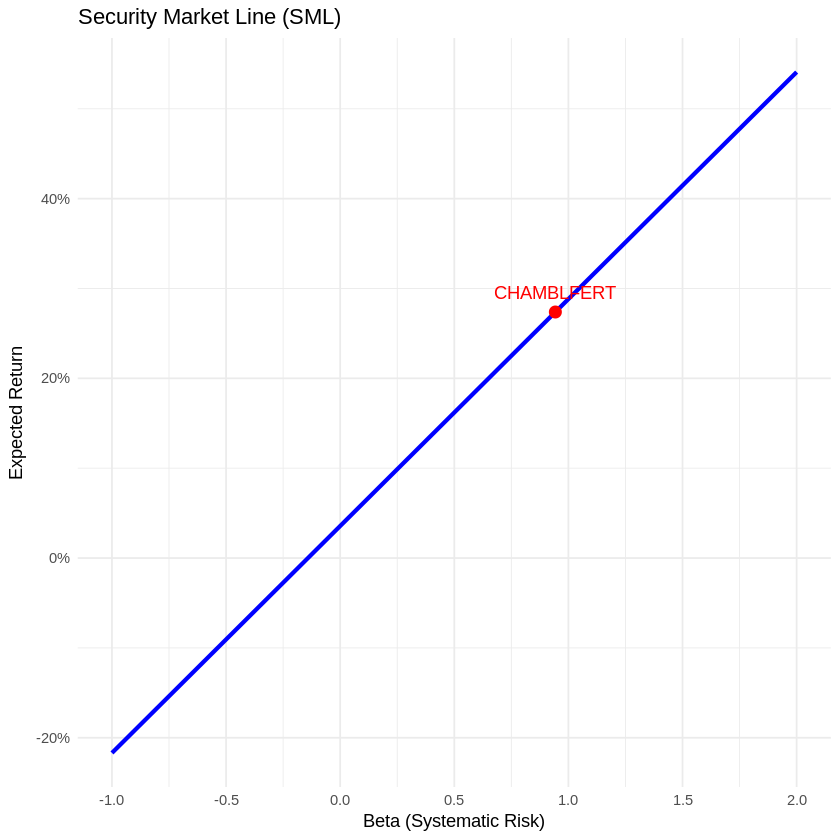

In [ ]:
install.packages(c("quantmod", "readxl"), dependencies = TRUE)
library(quantmod)
library(readxl)

# --------------------------- BETA CALCULATION ---------------------------

NSE <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-10-01", auto.assign = FALSE) #Get data
NSE
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-10-01", auto.assign = FALSE) #Get data
CHAMBLFERT

head(NSE, 5)
tail(NSE, 5)

Close <- cbind(Cl(NSE), Cl(CHAMBLFERT)) #Dataframe of closing prices
head(Close, 5)

Returns <- as.xts(tail(data.frame(Close), -1) / head(data.frame(Close), -1) - 1) #Calculate returns
head(Returns, 5)

# Run the regression model
regression <- lm(CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns))

# Slope parameter = beta in CAPM model
summary(regression)

# ------------------- RISK-FREE RATE CALCULATION -------------------

tbill_data <- read_excel("T-Bills_2024-2.xlsx", sheet = "Daily") #Load T-Bill Yield Data
head(tbill_data)

tbill_data$`Daily_Yield_%_Decimal` <- tbill_data$`Daily_Yield_%` / 100

avg_daily_yield <- mean(tbill_data$`Daily_Yield_%_Decimal`, na.rm = TRUE)

risk_free_rate <- (1 + avg_daily_yield)^252 - 1

cat("The annualized risk-free rate is:", round(risk_free_rate * 100, 2), "%\n")

# ------------------- MARKET RETURN CALCULATION -------------------

market_prices <- Ad(NSE)

daily_returns <- dailyReturn(market_prices, type = "log")

avg_daily_return <- mean(daily_returns, na.rm = TRUE)

annualized_return <- (1 + avg_daily_return)^252 - 1

initial_price <- as.numeric(first(market_prices))
final_price <- as.numeric(last(market_prices))

num_years <- as.numeric(difftime(index(last(market_prices)), index(first(market_prices)), units = "days")) / 365

cagr <- (final_price / initial_price)^(1 / num_years) - 1

cat("The annualized market return (CAGR) is:", round(cagr * 100, 2), "%\n")
cat("The annualized return based on average daily return is:", round(annualized_return * 100, 2), "%\n")

# ------------------- EXPECTED RETURN USING CAPM -------------------

beta <- coef(regression)["NSEI.Close"]
cat("The calculated beta for CHAMBLFERT is:", round(beta, 2), "\n")

rf <- risk_free_rate  # Annualized risk-free rate
rm <- cagr            # Market return (CAGR)

expected_return <- rf + beta * (rm - rf) #Expected return using CAPM formula
cat("The expected return for CHAMBLFERT using CAPM is:", round(expected_return * 100, 2), "%\n")

# ------------------- PLOTTING THE SECURITY MARKET LINE (SML) -------------------

sml_data <- data.frame(
  Beta = seq(-1, 2, by = 0.1),  # Range of betas from -1 to 2
  Expected_Return = rf + seq(-1, 2, by = 0.1) * (rm - rf)  # CAPM formula
)

stock_point <- data.frame(Beta = beta, Expected_Return = expected_return)

library(ggplot2) #Plot SML
sml_plot <- ggplot(data = sml_data, aes(x = Beta, y = Expected_Return)) +
  geom_line(color = "blue", size = 1.2) +  # SML line
  geom_point(data = stock_point, aes(x = Beta, y = Expected_Return), color = "red", size = 3) +  # CHAMBLFERT point
  labs(
    title = "Security Market Line (SML)",
    x = "Beta (Systematic Risk)",
    y = "Expected Return"
  ) +
  theme_minimal() +
  annotate(
    "text",
    x = beta, y = expected_return,
    label = "CHAMBLFERT",
    vjust = -1, color = "red"
  ) +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(breaks = seq(-1, 2, by = 0.5))

print(sml_plot)

#ARIMA MODELING (DAILY)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



           CHAMBLFERT.NS.Open CHAMBLFERT.NS.High CHAMBLFERT.NS.Low
2020-04-01             107.70             109.75             105.0
2020-04-03             105.50             107.25             103.2
2020-04-07             106.00             117.95             106.0
2020-04-08             112.00             123.70             110.0
2020-04-09             119.05             129.80             118.9
           CHAMBLFERT.NS.Close CHAMBLFERT.NS.Volume CHAMBLFERT.NS.Adjusted
2020-04-01              106.00               203505               95.00493
2020-04-03              104.65               256452               93.79498
2020-04-07              112.85              1277023              101.14441
2020-04-08              113.65              1000791              101.86141
2020-04-09              119.75              1469955              107.32869

                 Returns
2020-04-03 -0.0127358347
2020-04-07  0.0783563959
2020-04-08  0.0070890834
2020-04-09  0.0536735450
2020-04-13  0.0008350603
2020-04-15  0.0759282319

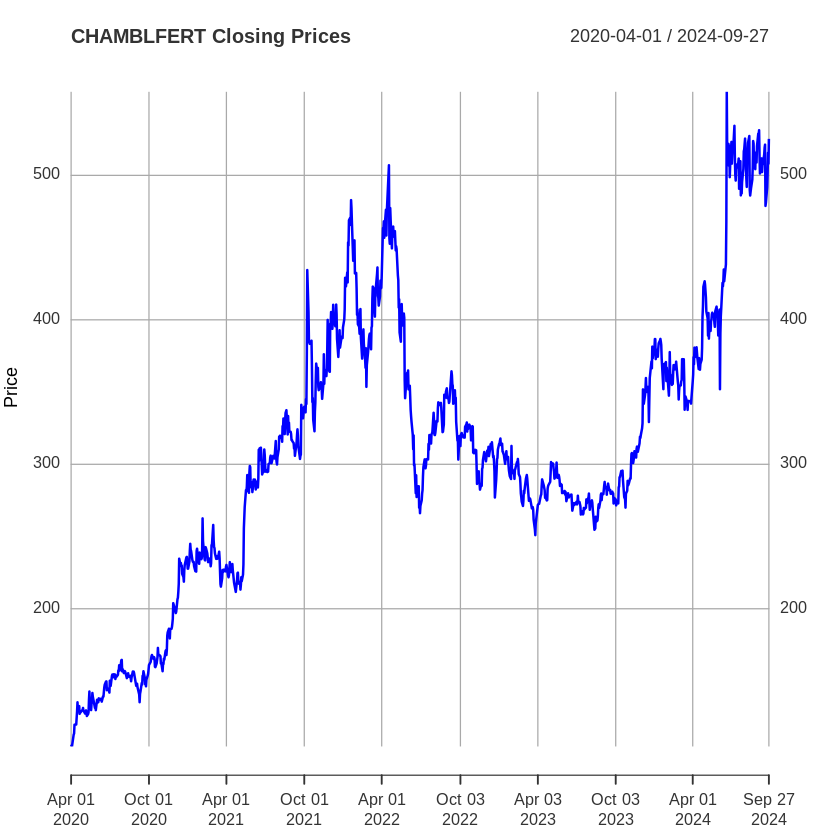

Warning message in adf.test(Returns_CHAMBLFERT$Returns, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Returns_CHAMBLFERT$Returns
Dickey-Fuller = -10.01, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary



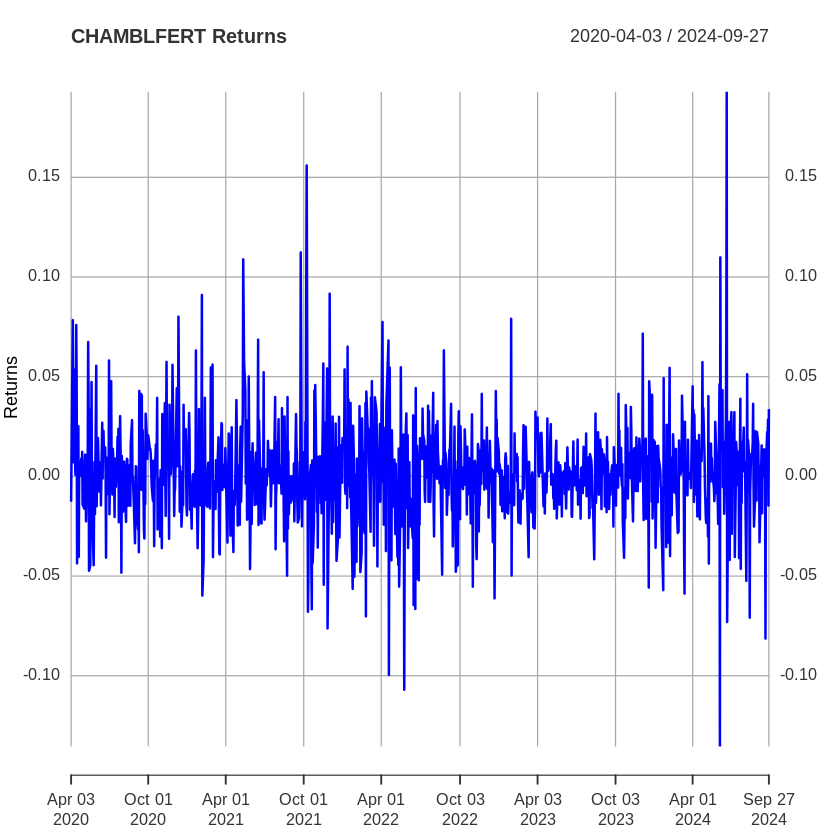

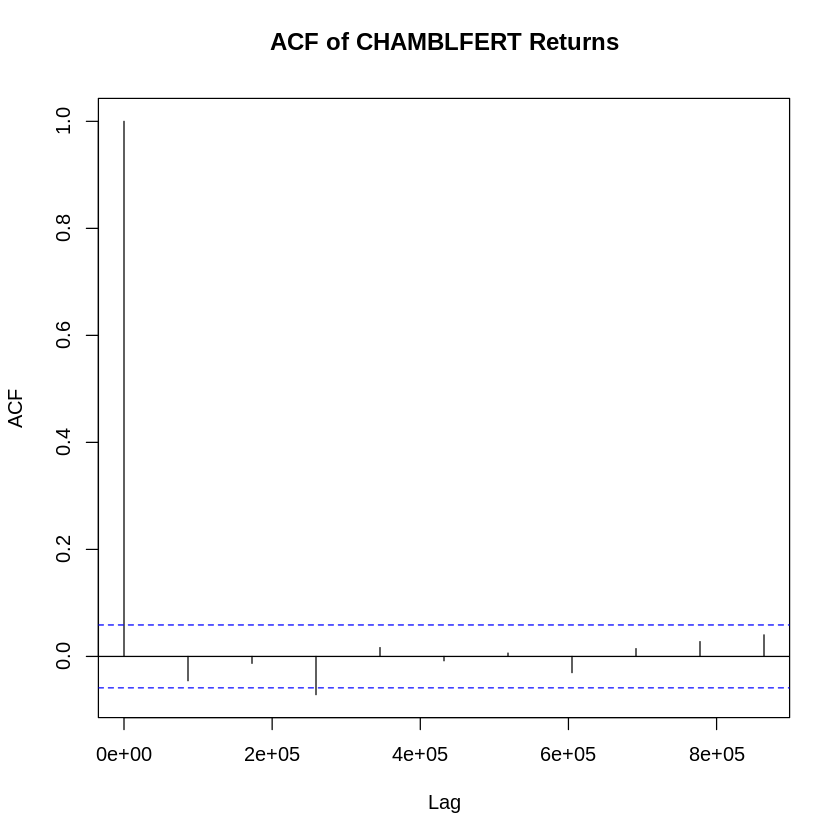

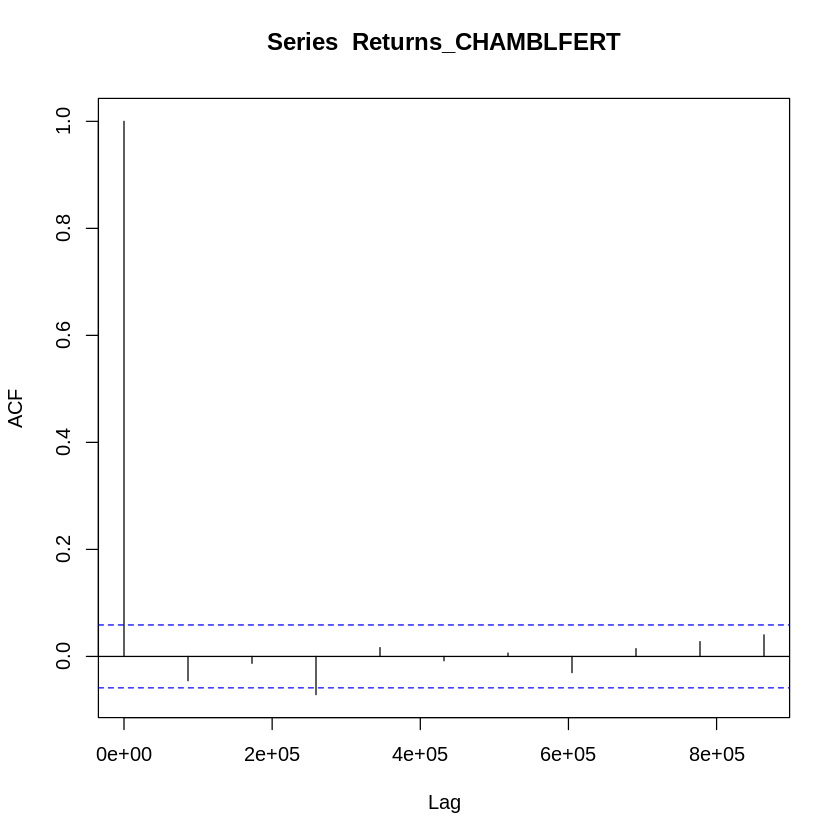

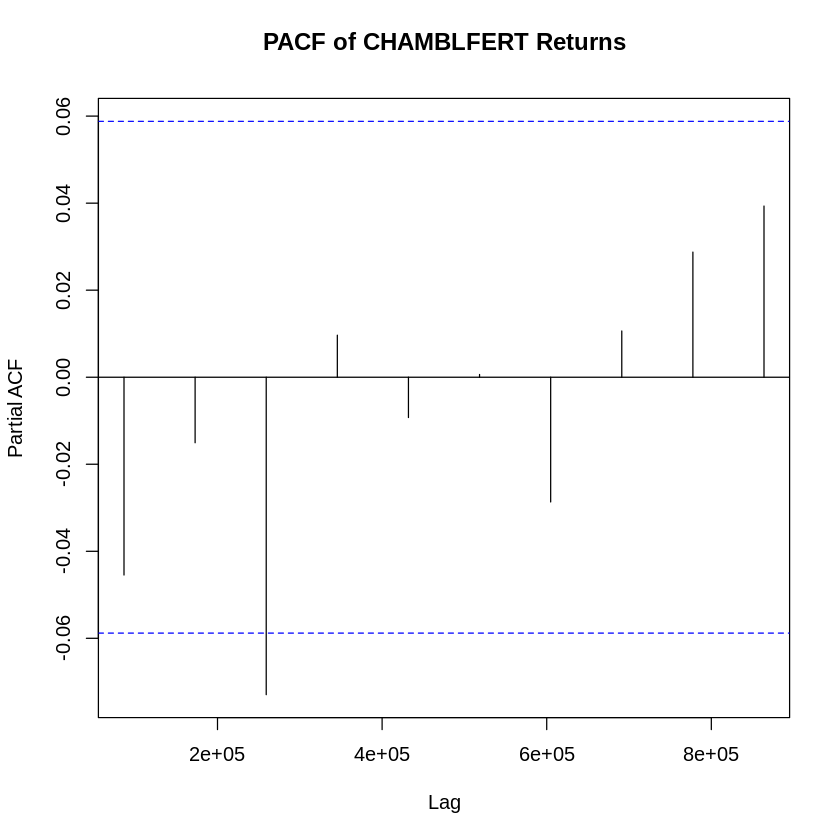

$pred
Time Series:
Start = 95990401 
End = 96768001 
Frequency = 1.15740740740741e-05 
 [1] 0.0003031809 0.0017808502 0.0017808502 0.0017808502 0.0017808502
 [6] 0.0017808502 0.0017808502 0.0017808502 0.0017808502 0.0017808502

$se
Time Series:
Start = 95990401 
End = 96768001 
Frequency = 1.15740740740741e-05 
 [1] 0.02615046 0.02617967 0.02617967 0.02617967 0.02617967 0.02617967
 [7] 0.02617967 0.02617967 0.02617967 0.02617967



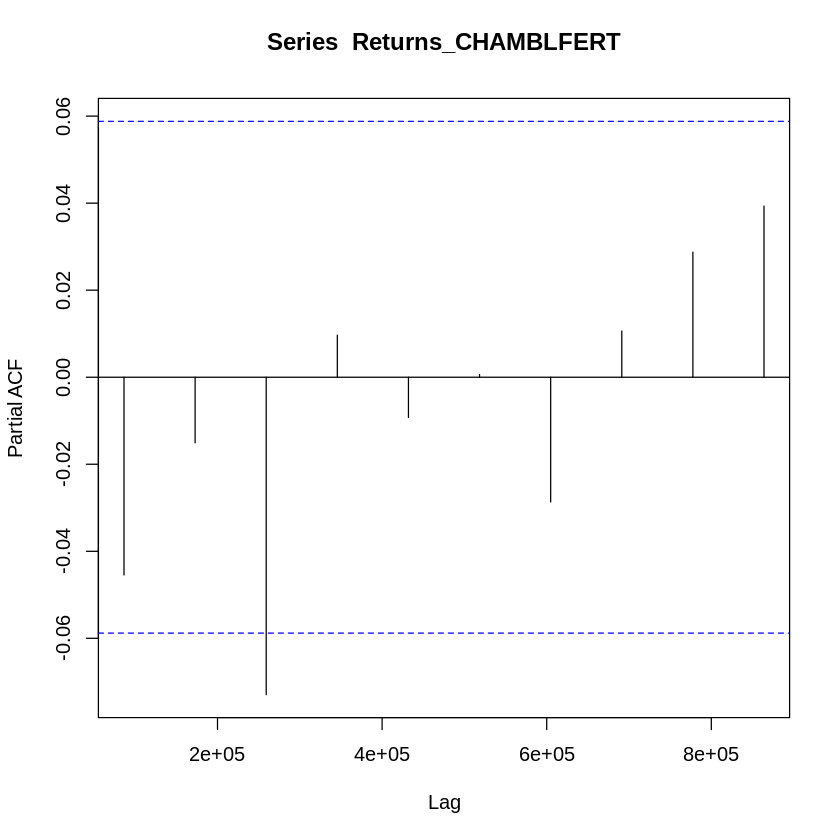

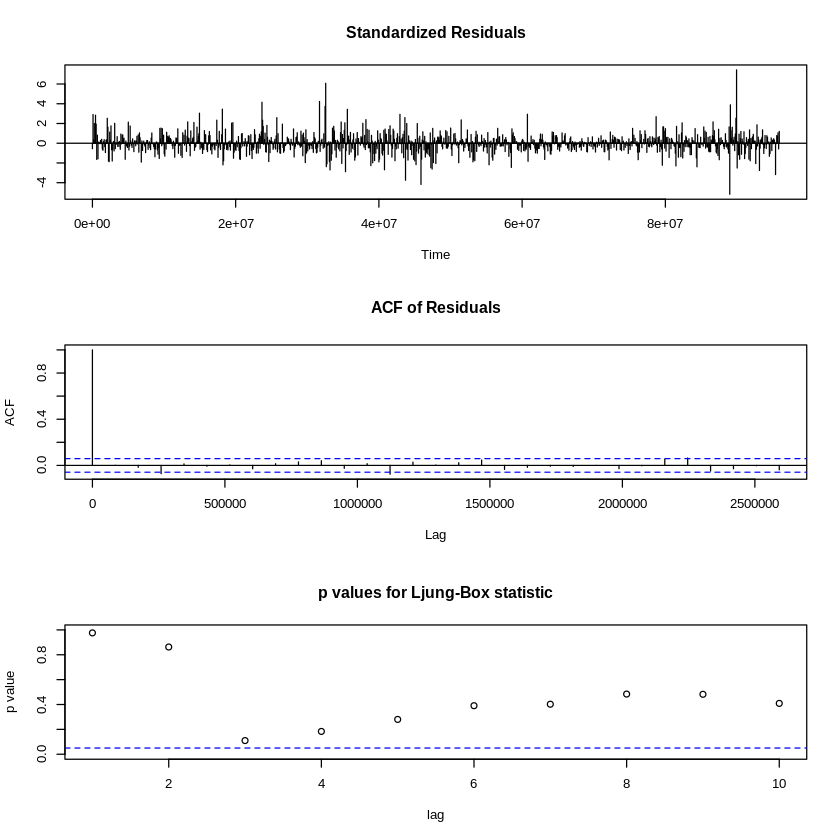

In [ ]:
install.packages("tseries")
install.packages("ggplot2")
library(tseries)
library(ggplot2)
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
head(CHAMBLFERT, 5)

# Calculate the Returns
Returns_CHAMBLFERT <- as.xts(tail(data.frame(CHAMBLFERT$CHAMBLFERT.NS.Close), -1)/head(data.frame(CHAMBLFERT$CHAMBLFERT.NS.Close), -1) -1, frequency = 365)
colnames(Returns_CHAMBLFERT) <- "Returns"
head(Returns_CHAMBLFERT)

# Plotting the Closing Prices and Returns
plot(Cl(CHAMBLFERT), main = "CHAMBLFERT Closing Prices", ylab = "Price", col = "blue")
plot(Returns_CHAMBLFERT, main = "CHAMBLFERT Returns", ylab = "Returns", col = "blue")

# Identifying the Model using ADF test
adf_test_result <- adf.test(Returns_CHAMBLFERT$Returns, alternative = "stationary")
print(adf_test_result)

# ACF and PACF plots to identify AR and MA terms
plot(acf(Returns_CHAMBLFERT, lag.max = 10, main = "ACF of CHAMBLFERT Returns"))  # For AR terms
plot(pacf(Returns_CHAMBLFERT, lag.max = 10, main = "PACF of CHAMBLFERT Returns"))  # For MA terms

# Fitting an ARIMA model
arima_final <- arima(Returns_CHAMBLFERT$Returns, order = c(0, 0, 1))  # Adjust ARIMA order based on ACF/PACF

# Prediction using this model
predicted <- predict(arima_final, n.ahead = 10)
print(predicted)

# Diagnostics of the model
tsdiag(arima_final)


#GARCH AND EGARCH MODELING (DAILY)

In [ ]:
install.packages("rugarch")
install.packages("rmgarch")
library(quantmod)
library(rugarch)
library(rmgarch)

# Get data for CHAMBLFERT.NS
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
head(CHAMBLFERT)

# Calculating Daily Returns
rCHAMBLFERT <- dailyReturn(CHAMBLFERT)
head(rCHAMBLFERT)

# Implementing Univariate GARCH specification
ug_spec <- ugarchspec()
ug_spec

# Implementing EGARCH specification
eg_spec <- ugarchspec(variance.model = list(model = "eGARCH"))
eg_spec

# Estimating the GARCH model
ugfit <- ugarchfit(spec = ug_spec, data = rCHAMBLFERT)
ugfit

# Forecasting using the fitted GARCH model
ugforecast <- ugarchforecast(ugfit, n.ahead = 10)
ugforecast


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘fracdiff’, ‘nloptr’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gmp’, ‘Rmpfr’, ‘Bessel’, ‘ff’, ‘shape’, ‘pcaPP’, ‘corpcor’


Warning message in install.packages("rmgarch"):
“installation of package ‘gmp’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Rmpfr’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘Bessel’ had non-zero exit status”
Warning message in install.packages("rmgarch"):
“installation of package ‘rmgarch’ had non-zero exit status”
Loading required package: parallel


Attaching package

ERROR: Error in library(rmgarch): there is no package called ‘rmgarch’


#NIFTY WEEKLY CLOSING PRICE

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Extract the weekly closing prices
nifty_weekly <- to.weekly(nifty_data, indexAt = "lastof", drop.time = TRUE)
nifty_weekly_close <- Cl(nifty_weekly)  # Closing prices for each week

# Plot the weekly closing prices and get summary
plot(nifty_weekly_close, main = "Weekly Closing Prices of Nifty 50 (April 2020 - September 2024)",
     ylab = "Weekly Closing Price", xlab = "Date", col = "purple", type = "l")

nifty_weekly_summary <- summary(nifty_weekly_close)
print(nifty_weekly_summary)




#CHAMBLFERT WEEKLY CLOSING PRICE

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly data
CHAMBLFERT_weekly <- to.weekly(CHAMBLFERT_data, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_weekly_close <- Cl(CHAMBLFERT_weekly)  # Extract weekly closing prices

# Plot the weekly closing prices and get summary
plot(CHAMBLFERT_weekly_close, main = "Weekly Closing Prices of CHAMBLFERT (April 2020 - September 2024)",
     ylab = "Weekly Closing Price", xlab = "Date", col = "darkgreen", type = "l")

CHAMBLFERT_weekly_summary <- summary(CHAMBLFERT_weekly_close)
print(CHAMBLFERT_weekly_summary)


#NIFTY WEEKLY RETURNS

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly data and extract weekly closing prices
nifty_weekly <- to.weekly(nifty_data, indexAt = "lastof", drop.time = TRUE)
nifty_weekly_close <- Cl(nifty_weekly)

# Calculate weekly returns
nifty_weekly_returns <- weeklyReturn(nifty_weekly_close)

# Plot the weekly returns and get summary
plot(nifty_weekly_returns, main = "Weekly Returns of Nifty 50 (April 2020 - September 2024)",
     ylab = "Weekly Return", xlab = "Date", col = "purple", type = "l")

nifty_weekly_returns_summary <- summary(nifty_weekly_returns)
print(nifty_weekly_returns_summary)


#CHAMBLFERT WEEKLY RETURNS

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly data and extract weekly closing prices
CHAMBLFERT_weekly <- to.weekly(CHAMBLFERT_data, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_weekly_close <- Cl(CHAMBLFERT_weekly)

# Calculate weekly returns
CHAMBLFERT_weekly_returns <- weeklyReturn(CHAMBLFERT_weekly_close)

# Plot the weekly returns and get summary
plot(CHAMBLFERT_weekly_returns, main = "Weekly Returns of CHAMBLFERT.NS (April 2020 - September 2024)",
     ylab = "Weekly Return", xlab = "Date", col = "darkgreen", type = "l")

CHAMBLFERT_weekly_returns_summary <- summary(CHAMBLFERT_weekly_returns)
print(CHAMBLFERT_weekly_returns_summary)


#ESTIMATING BETA USING CAPM (WEEKLY)


In [ ]:
install.packages("quantmod")
library(quantmod)
require(quantmod)

# Get data for Nifty 50 and CHAMBLFERT Equity
NSE <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly data and extract weekly closing prices
NSE_weekly <- to.weekly(NSE, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_weekly <- to.weekly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)

# Create a data frame of weekly closing prices
Close_weekly <- cbind(Cl(NSE_weekly), Cl(CHAMBLFERT_weekly))
colnames(Close_weekly) <- c("NSEI.Close", "CHAMBLFERT.NS.Close")

# Calculate the weekly returns
Returns_weekly <- na.omit(weeklyReturn(Close_weekly))

# Display the first few rows of the weekly returns
head(Returns_weekly, 5)

# Run the regression model for weekly returns
regression_weekly <- lm(CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns_weekly))

# Plot the weekly returns and regression line
plot(Returns_weekly$NSEI.Close, Returns_weekly$CHAMBLFERT.NS.Close,
     main = "Weekly Returns Regression: CHAMBLFERT vs. Nifty 50",
     xlab = "Nifty 50 Weekly Return", ylab = "CHAMBLFERT Weekly Return", col = "blue", pch = 19)
abline(regression_weekly, col = "red", lwd = 2)

# Display the summary of the regression model (Slope parameter = beta in CAPM model)
summary(regression_weekly)


#ARIMA MODELING (WEEKLY)

In [ ]:
install.packages("tseries")
install.packages("ggplot2")
library(tseries)
library(ggplot2)
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly and get weekly closing prices and calculating weekly returns
CHAMBLFERT_weekly <- to.weekly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_weekly_close <- Cl(CHAMBLFERT_weekly)
Returns_CHAMBLFERT_weekly <- diff(log(CHAMBLFERT_weekly_close))
colnames(Returns_CHAMBLFERT_weekly) <- "Returns"
head(Returns_CHAMBLFERT_weekly)

# Plotting the Weekly Closing Prices and Returns
plot(CHAMBLFERT_weekly_close, main = "CHAMBLFERT Weekly Closing Prices", ylab = "Price", col = "blue")
plot(Returns_CHAMBLFERT_weekly, main = "CHAMBLFERT Weekly Returns", ylab = "Returns", col = "blue")

# Identifying the Model using ADF test on weekly returns
adf_test_result <- adf.test(Returns_CHAMBLFERT_weekly, alternative = "stationary")
print(adf_test_result)

# ACF and PACF plots to identify AR and MA terms
acf(Returns_CHAMBLFERT_weekly, lag.max = 10, main = "ACF of CHAMBLFERT Weekly Returns")  # For AR terms
pacf(Returns_CHAMBLFERT_weekly, lag.max = 10, main = "PACF of CHAMBLFERT Weekly Returns")  # For MA terms

# Fitting an ARIMA model to weekly returns
arima_final_weekly <- arima(Returns_CHAMBLFERT_weekly, order = c(0, 0, 1))  # Adjust ARIMA order based on ACF/PACF

# Prediction using this model
predicted_weekly <- predict(arima_final_weekly, n.ahead = 10)
print(predicted_weekly)

# Diagnostics of the model
tsdiag(arima_final_weekly)


#GARCH AND EGARCH MODELING (WEEKLY)


In [ ]:
install.packages("quantmod")
install.packages("rugarch")
install.packages("rmgarch")
library(quantmod)
library(rugarch)
library(rmgarch)

# Getting data for CHAMBLFERT
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to weekly and get the closing prices
CHAMBLFERT_weekly <- to.weekly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_weekly_close <- Cl(CHAMBLFERT_weekly)

# Calculating Weekly Returns
rCHAMBLFERT_weekly <- diff(log(CHAMBLFERT_weekly_close))  # Log returns for weekly data
colnames(rCHAMBLFERT_weekly) <- "Weekly_Returns"
head(rCHAMBLFERT_weekly)

# Implementing Univariate GARCH specification for weekly data
ug_spec <- ugarchspec()
ug_spec

# Implementing EGARCH specification for weekly data
eg_spec <- ugarchspec(variance.model = list(model = "eGARCH"))
eg_spec

# Estimating the GARCH model
ugfit_weekly <- ugarchfit(spec = ug_spec, data = rCHAMBLFERT_weekly)
print(ugfit_weekly)

# Forecasting using the fitted GARCH model
ugforecast_weekly <- ugarchforecast(ugfit_weekly, n.ahead = 10)
print(ugforecast_weekly)

# Plot the forecasts for weekly returns
plot(ugforecast_weekly, main = "10-Week Ahead Forecasts for Weekly Returns of CHAMBLFERT.NS")


#NIFTY MONTHLY CLOSING PRICE




In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert to monthly data and extract the monthly closing prices
nifty_monthly <- to.monthly(nifty_data, indexAt = "lastof", drop.time = TRUE)
nifty_monthly_close <- Cl(nifty_monthly)  # Closing prices for each month

# Plot the monthly closing prices and get summary
plot(nifty_monthly_close, main = "Monthly Closing Prices of Nifty 50 (April 2020 - September 2024)",
     ylab = "Monthly Closing Price", xlab = "Date", col = "purple", type = "l")

nifty_monthly_summary <- summary(nifty_monthly_close)
print(nifty_monthly_summary)

#CHAMBLFERT MONTHLY CLOSING PRICE




In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly data
CHAMBLFERT_monthly <- to.monthly(CHAMBLFERT_data, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_monthly_close <- Cl(CHAMBLFERT_monthly)  # Extract monthly closing prices

# Plot the monthly closing prices and get summary
plot(CHAMBLFERT_monthly_close, main = "Monthly Closing Prices of CHAMBLFERT (April 2020 - September 2024)",
     ylab = "Monthly Closing Price", xlab = "Date", col = "darkgreen", type = "l")

CHAMBLFERT_monthly_summary <- summary(CHAMBLFERT_monthly_close)
print(CHAMBLFERT_monthly_summary)

#NIFTY MONTHLY RETURNS


In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for Nifty 50
nifty_data <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly data and extract monthly closing prices
nifty_monthly <- to.monthly(nifty_data, indexAt = "lastof", drop.time = TRUE)
nifty_monthly_close <- Cl(nifty_monthly)

# Calculate monthly returns
nifty_monthly_returns <- monthlyReturn(nifty_monthly_close)

# Plot the monthly returns and get summary
plot(nifty_monthly_returns, main = "Monthly Returns of Nifty 50 (April 2020 - September 2024)",
     ylab = "Monthly Return", xlab = "Date", col = "purple", type = "l")

nifty_monthly_returns_summary <- summary(nifty_monthly_returns)
print(nifty_monthly_returns_summary)

#CHAMBLFERT MONTHLY RETURNS

In [ ]:
install.packages("quantmod")
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT_data <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly data and extract monthly closing prices
CHAMBLFERT_monthly <- to.monthly(CHAMBLFERT_data, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_monthly_close <- Cl(CHAMBLFERT_monthly)

# Calculate monthly returns
CHAMBLFERT_monthly_returns <- monthlyReturn(CHAMBLFERT_monthly_close)

# Plot the monthly returns and get summary
plot(CHAMBLFERT_monthly_returns, main = "Monthly Returns of CHAMBLFERT.NS (April 2020 - September 2024)",
     ylab = "Monthly Return", xlab = "Date", col = "darkgreen", type = "l")

CHAMBLFERT_monthly_returns_summary <- summary(CHAMBLFERT_monthly_returns)
print(CHAMBLFERT_monthly_returns_summary)

#ESTIMATING BETA USING CAPM (MONTHLY)


In [ ]:
install.packages("quantmod")
library(quantmod)
require(quantmod)

# Get data for Nifty 50 and CHAMBLFERT Equity
NSE <- getSymbols("^NSEI", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly data and extract monthly closing prices
NSE_monthly <- to.monthly(NSE, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_monthly <- to.monthly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)

# Create a data frame of monthly closing prices
Close_monthly <- cbind(Cl(NSE_monthly), Cl(CHAMBLFERT_monthly))
colnames(Close_monthly) <- c("NSEI.Close", "CHAMBLFERT.NS.Close")

# Calculate the monthly returns
Returns_monthly <- na.omit(monthlyReturn(Close_monthly))

# Display the first few rows of the monthly returns
head(Returns_monthly, 5)

# Run the regression model for monthly returns
regression_monthly <- lm(CHAMBLFERT.NS.Close ~ NSEI.Close, data = data.frame(Returns_monthly))

# Plot the monthly returns and regression line
plot(Returns_monthly$NSEI.Close, Returns_monthly$CHAMBLFERT.NS.Close,
     main = "Monthly Returns Regression: CHAMBLFERT vs. Nifty 50",
     xlab = "Nifty 50 Monthly Return", ylab = "CHAMBLFERT Monthly Return", col = "blue", pch = 19)
abline(regression_monthly, col = "red", lwd = 2)

# Display the summary of the regression model (Slope parameter = beta in CAPM model)
summary(regression_monthly)


#ARIMA MODELING (MONTHLY)


In [ ]:
install.packages("tseries")
install.packages("ggplot2")
install.packages("quantmod")
library(tseries)
library(ggplot2)
library(quantmod)

# Get data for CHAMBLFERT.NS
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly and extract monthly closing prices, then calculate monthly returns
CHAMBLFERT_monthly <- to.monthly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_monthly_close <- Cl(CHAMBLFERT_monthly)
Returns_CHAMBLFERT_monthly <- diff(log(CHAMBLFERT_monthly_close))
colnames(Returns_CHAMBLFERT_monthly) <- "Returns"
head(Returns_CHAMBLFERT_monthly)

# Plotting the Monthly Closing Prices and Returns
plot(CHAMBLFERT_monthly_close, main = "CHAMBLFERT Monthly Closing Prices", ylab = "Price", col = "blue")
plot(Returns_CHAMBLFERT_monthly, main = "CHAMBLFERT Monthly Returns", ylab = "Returns", col = "blue")

# Identifying the Model using ADF test on monthly returns
adf_test_result_monthly <- adf.test(Returns_CHAMBLFERT_monthly, alternative = "stationary")
print(adf_test_result_monthly)

# ACF and PACF plots to identify AR and MA terms for monthly returns
acf(Returns_CHAMBLFERT_monthly, lag.max = 10, main = "ACF of CHAMBLFERT Monthly Returns")  # For AR terms
pacf(Returns_CHAMBLFERT_monthly, lag.max = 10, main = "PACF of CHAMBLFERT Monthly Returns")  # For MA terms

# Fitting an ARIMA model to monthly returns (Adjust ARIMA order based on ACF/PACF analysis)
arima_final_monthly <- arima(Returns_CHAMBLFERT_monthly, order = c(0, 0, 1))

# Prediction using the fitted ARIMA model for monthly returns
predicted_monthly <- predict(arima_final_monthly, n.ahead = 10)
print(predicted_monthly)

# Diagnostics of the model
tsdiag(arima_final_monthly)


#GARCH AND EGARCH MODELING (MONTHLY)

In [ ]:
install.packages("quantmod")
install.packages("rugarch")
install.packages("rmgarch")
library(quantmod)
library(rugarch)
library(rmgarch)

# Getting data for CHAMBLFERT.NS
CHAMBLFERT <- getSymbols("CHAMBLFERT.NS", from = "2020-04-01", to = "2024-09-30", auto.assign = FALSE)

# Convert daily data to monthly and get the closing prices
CHAMBLFERT_monthly <- to.monthly(CHAMBLFERT, indexAt = "lastof", drop.time = TRUE)
CHAMBLFERT_monthly_close <- Cl(CHAMBLFERT_monthly)

# Calculating Monthly Returns
rCHAMBLFERT_monthly <- diff(log(CHAMBLFERT_monthly_close))  # Log returns for monthly data
colnames(rCHAMBLFERT_monthly) <- "Monthly_Returns"
head(rCHAMBLFERT_monthly)

# Implementing Univariate GARCH specification for monthly data
ug_spec_monthly <- ugarchspec()
ug_spec_monthly

# Implementing EGARCH specification for monthly data
eg_spec_monthly <- ugarchspec(variance.model = list(model = "eGARCH"))
eg_spec_monthly

# Estimating the GARCH model on monthly data
ugfit_monthly <- ugarchfit(spec = ug_spec_monthly, data = rCHAMBLFERT_monthly)
print(ugfit_monthly)

# Forecasting using the fitted GARCH model for monthly data
ugforecast_monthly <- ugarchforecast(ugfit_monthly, n.ahead = 10)
print(ugforecast_monthly)

# Plot the forecasts for monthly returns
plot(ugforecast_monthly, main = "10-Month Ahead Forecasts for Monthly Returns of CHAMBLFERT.NS")


In [ ]:
#Estimating the EGARCH model
egfit <- ugarchfit(spec = eg_spec, data = rCHAMBLFERT)
egfit

# Forecasting using the fitted EGARCH model
egforecast <- ugarchforecast(egfit, n.ahead = 10)
egforecast